In [3]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 7.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 8.3 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 8.5 MB/s eta 0:00:0000:0100:01m


In [2]:
import numpy as np
import pandas as pd
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

# Example datasets

1) Georgia
2) Berlin AirBnB

# Georgia Dataset

### Load Georgia dataset and generate plot of Georgia counties


In [3]:
georgia = gp.read_file(ps.examples.get_path('G_utm.shp'))
georgia.head()

,AREA,PERIMETER,G_UTM_,G_UTM_ID,Latitude,Longitud,TotPop90,PctRural,PctBach,PctEld,PctFB,PctPov,PctBlack,X,Y,AreaKey,geometry
0,1.331370e+09,207205.0,132,133,31.75339,-82.28558,15744,75.6,8.2,11.43,0.64,19.9,20.76,941396.6,3521764,13001,"POLYGON ((931869.062 3545540.500, 934111.625 3..."
1,8.929300e+08,154640.0,157,158,31.29486,-82.87474,6213,100.0,6.4,11.77,1.58,26.0,26.86,895553.0,3471916,13003,"POLYGON ((867016.312 3482416.000, 884309.375 3..."
2,7.434020e+08,130431.0,148,146,31.55678,-82.45115,9566,61.7,6.6,11.11,0.27,24.1,15.42,930946.4,3502787,13005,"POLYGON ((914656.875 3512190.000, 924718.375 3..."
3,9.053950e+08,185737.0,158,155,31.33084,-84.45401,3615,100.0,9.4,13.17,0.11,24.8,51.67,745398.6,3474765,13007,"POLYGON ((744258.625 3480598.500, 765025.062 3..."
4,6.941830e+08,151347.0,76,79,33.07193,-83.25085,39530,42.7,13.3,8.64,1.43,17.5,42.39,849431.3,3665553,13009,"POLYGON ((832974.188 3677273.500, 834048.688 3..."


In [4]:
georgia.describe()

,AREA,PERIMETER,G_UTM_,G_UTM_ID,Latitude,Longitud,TotPop90,PctRural,PctBach,PctEld,PctFB,PctPov,PctBlack,X,Y,AreaKey
count,1.590000e+02,159.000000,159.000000,159.000000,159.000000,159.00000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,1.590000e+02,1.590000e+02,159.000000
mean,9.384097e+08,151114.281132,87.056604,86.012579,32.807894,-83.57621,40743.496855,70.179874,10.947170,11.740629,1.131132,19.340881,27.393082,8.209444e+05,3.636238e+06,13161.490566
std,4.184036e+08,44710.261018,51.167415,51.142762,1.186456,1.04390,83663.765190,27.099374,5.697032,3.080941,1.236294,7.253338,17.382289,9.909353e+04,1.303592e+05,93.281856
min,6.552190e+04,1320.290000,2.000000,1.000000,30.716700,-85.50471,1915.000000,2.500000,4.200000,1.460000,0.040000,2.600000,0.000000,6.359643e+05,3.401148e+06,13001.000000
25%,6.555360e+08,121564.000000,42.500000,41.500000,31.788295,-84.44495,9219.500000,54.700000,7.600000,9.810000,0.415000,14.050000,11.750000,7.411438e+05,3.523380e+06,13082.000000
50%,8.929300e+08,151347.000000,86.000000,85.000000,32.748710,-83.68734,16934.000000,72.300000,9.400000,12.070000,0.720000,18.600000,27.640000,8.097369e+05,3.636468e+06,13161.000000
75%,1.183735e+09,174725.000000,131.500000,130.500000,33.788020,-82.84562,36058.000000,100.000000,12.000000,13.700000,1.265000,24.650000,40.065000,8.945841e+05,3.741656e+06,13242.000000
max,2.356370e+09,341307.000000,174.000000,173.000000,34.918640,-81.08524,648951.000000,100.000000,37.500000,22.960000,6.740000,35.900000,79.640000,1.059706e+06,3.872640e+06,13321.000000


In [5]:
georgia.dtypes

AREA          float64
PERIMETER     float64
G_UTM_          int64
G_UTM_ID        int64
Latitude      float64
Longitud      float64
TotPop90        int64
PctRural      float64
PctBach       float64
PctEld        float64
PctFB         float64
PctPov        float64
PctBlack      float64
X             float64
Y               int64
AreaKey         int64
geometry     geometry
dtype: object

In [6]:
type(georgia)

geopandas.geodataframe.GeoDataFrame

#### Draw

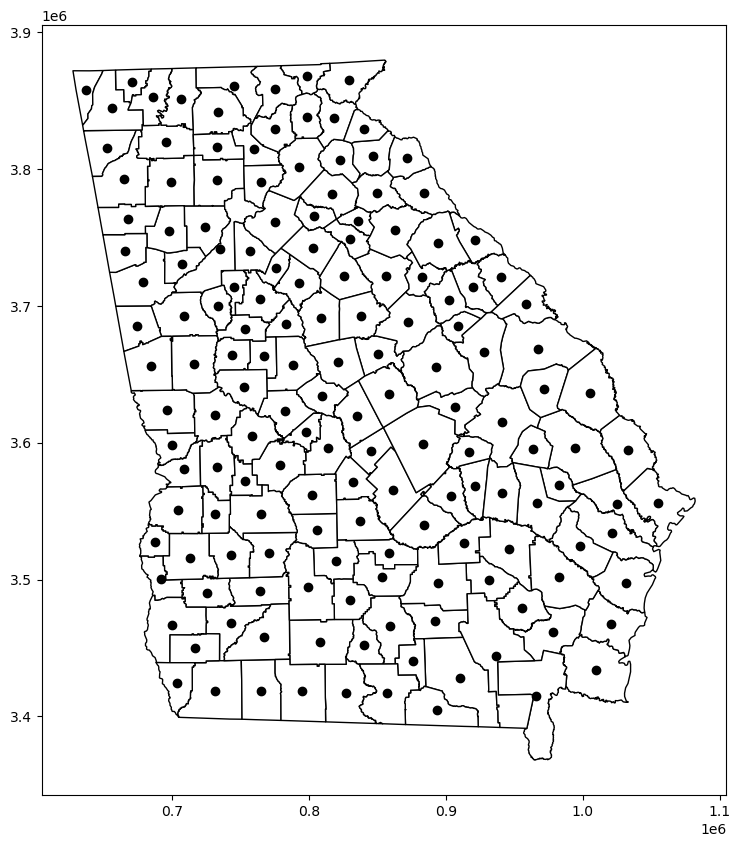

In [7]:
fig, ax = plt.subplots(figsize = (10, 10)) 
georgia.plot(ax=ax, **{'edgecolor': 'black', 'facecolor': 'white'}) 
georgia.centroid.plot(ax = ax, c = 'black')
# plt.savefig('georgia_shp')
plt.show()

In [8]:
# Prepare Georgia dataset inputs
g_y = georgia['PctBach'].values.reshape((-1, 1))
g_X = georgia[['PctFB', 'PctBlack', 'PctRural']].values
u = georgia['X']
v = georgia['Y']
g_coords = list(zip(u, v))

In [9]:
# Instantiate bandwidth selection object
selector = Sel_BW(g_coords, g_y, g_X)

### Bandwith selection

In [12]:
#Default golden section search using AICc criterion 
bw = selector.search()
print(bw)

117.0


In [13]:
#Interval search using AICc criterion 
bw = selector.search(search_method = 'interval', interval = 2, bw_min = 101, bw_max = 150)
print(bw)

117


### Model calibration

In [14]:
# Calibrate a GWR model for Georgia dataset using computationally selected~bandwidth 
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search() 
print(gwr_bw)
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
gwr_results = gwr_model.fit()
print(gwr_results.resid_ss)

117.0
1650.8596982770284


In [15]:
#Calibrate a GWR model for the Georgia dataset #using a manually set~bandwidth 
gwr_model = GWR(g_coords, g_y, g_X, 117) 
gwr_results = gwr_model.fit() 
print(gwr_results.resid_ss)

1650.8596982770284


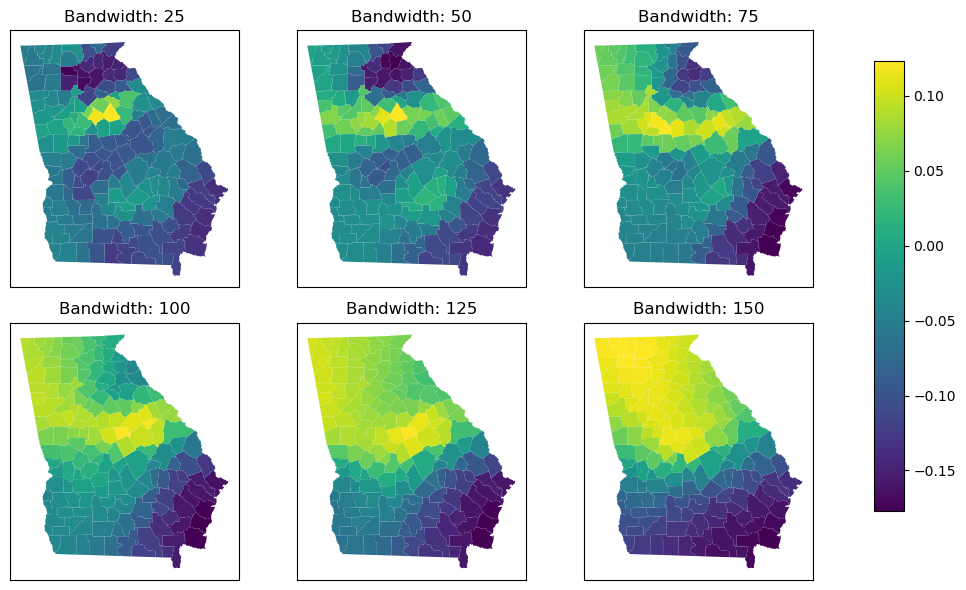

In [37]:
#Exploring spatial heterogeneity by manually varying~bandwidth 
fig, ax = plt.subplots(2, 3, figsize = (10, 6)) 
bws = (x for x in range(25, 175, 25))
vmins = []
vmaxs = [] 
for row in range(2): 
    for col in range(3): 
        bw = next(bws) 
        gwr_model = GWR(g_coords, g_y, g_X, bw) 
        gwr_results = gwr_model.fit() 
        georgia['rural'] = gwr_results.params[:, -1] 
        georgia.plot('rural', ax = ax[row, col]) 
        ax[row,col].set_title('Bandwidth: ' + str(bw)) 
        ax[row,col].get_xaxis().set_visible(False) 
        ax[row,col].get_yaxis().set_visible(False) 
        vmins.append(georgia['rural'].min()) 
        vmaxs.append(georgia['rural'].max())

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(vmins), vmax=max(vmaxs))) 
fig.tight_layout() 
fig.subplots_adjust(right=0.9) 
cax = fig.add_axes([0.92, 0.14, 0.03, 0.75]) 
sm._A = [] 
cbar = fig.colorbar(sm, cax=cax) 
cbar.ax.tick_params(labelsize=10) 
plt.savefig('explore') 
plt.show()

In [16]:
from spglm.family import Poisson, Binomial

### 3.5. Model Diagnostics

In [17]:
# Global model~fit 
gwr_selector = Sel_BW(g_coords, g_y, g_X) 
gwr_bw = gwr_selector.search() 
print(gwr_bw)
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
gwr_results = gwr_model.fit() 
print(gwr_results.aic) 
print(gwr_results.aicc)
print(gwr_results.R2)

117.0
848.9154070534352
851.3502927844658
0.6780742669593463


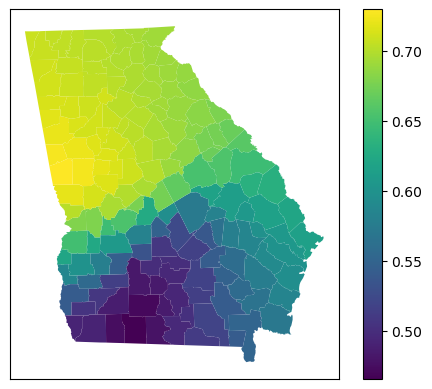

In [18]:
#Local model fit 
georgia['R2'] = gwr_results.localR2 
georgia.plot('R2', legend = True) 
ax = plt.gca() 
ax.get_xaxis().set_visible(False) 
ax.get_yaxis().set_visible(False) 
plt.savefig('local_R2') 
plt.show()

### Load Berlin dataset and generate plot of properties

# Berlin AirBnb Dataset

### Prepare Georgia dataset inputs

In [25]:
#Load Berlin dataset and generate plot of properties (Figure 2) 
prenz = gp.read_file(ps.examples.get_path('prenzlauer.zip')) 
prenz.head()

,accommodat,review_sco,bedrooms,bathrooms,beds,price,X,Y,geometry
0,2,100.0,1.0,1.0,1.0,35.0,1.494450e+06,6.899036e+06,POINT (1494450.105 6899036.141)
1,2,90.0,1.0,1.0,1.0,23.0,1.494354e+06,6.899121e+06,POINT (1494353.555 6899120.594)
2,2,93.0,1.0,1.0,1.0,38.0,1.494406e+06,6.898809e+06,POINT (1494405.897 6898808.518)
3,2,100.0,1.0,1.0,1.0,50.0,1.494271e+06,6.898655e+06,POINT (1494270.517 6898655.223)
4,2,100.0,1.0,1.0,1.0,80.0,1.493982e+06,6.899397e+06,POINT (1493982.078 6899397.385)


In [26]:
prenz_bound = gp.read_file(ps.examples.get_path('prenz_bound.zip'))
prenz_bound.head()

,neighbourh,geometry
0,Helmholtzplatz,"POLYGON ((1496989.669 6899662.266, 1497008.148..."


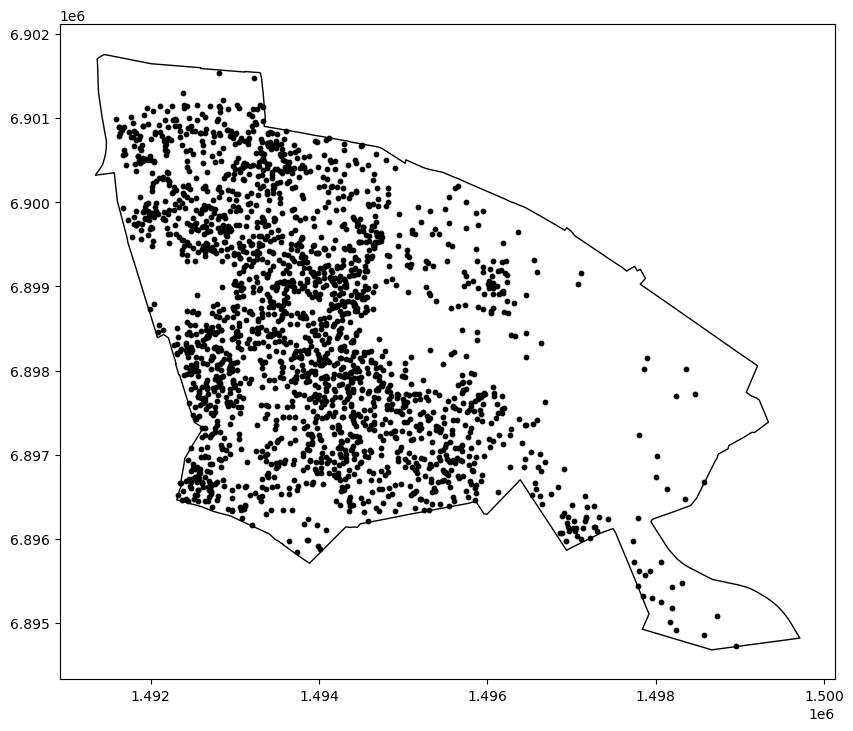

In [27]:
fig, ax = plt.subplots(figsize = (10, 10)) 
prenz_bound.plot(ax = ax, **{'edgecolor': 'black', 'facecolor': 'white'}) 
prenz.plot(ax = ax, markersize = 10, **{'edgecolor': 'black', 'facecolor': 'black'})
# plt.savefig('prenz')
plt.show()

In [ ]:
#Prepare Berlin dataset inputs #Take the logarithm of the price variable to correct for skewing 
b_y = np.log(prenz['price'].values.reshape((-1, 1))) 
b_X = prenz[['review_sco', 'accommodat', 'bathrooms']].values 
u = prenz['X']
v = prenz['Y'] 
b_coords = list(zip(u, v))